In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Matplotlib
## Introduction
`Matplotlib` is a library for producing **publication-quality figures**.  
`mpl` (for short) was designed from the beginning to serve **two purposes**. 
* First, allow for **interactive, cross-platform** control of figures and plots, 
* second, to make it **very easy** to produce static raster or vector **graphics files** without the need for any GUIs. 
* Furthermore, mpl -- much like Python itself -- gives the developer **complete control** over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation.  
It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).


## Gallery
Many users of Matplotlib are often faced with the question, "`I want to make a figure that has X with Y in the same figure, but it needs to look like Z`". Good luck getting an answer from a web search with that query! 

This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, 
* because it **showcases the variety of ways one can make figures**. 
* **Browse through the gallery**, click on any figure that has pieces of what you want to see and the **code** that generated it. 
* Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, **if you have a new and interesting plot** that demonstrates a feature of Matplotlib, feel free to **submit** a concise, well-commented version of the code for inclusion in the gallery.

## Mailing Lists and StackOverflow
When you are just simply stuck, and cannot figure out how to get something to work, or just need some hints on how to get started, you will find much of the community at the matplotlib-users [mailing list](https://mail.python.org/mailman/listinfo/matplotlib-users). This mailing list is an excellent resource of information with many friendly members who just love to help out newcomers. The number one rule to remember with this list is to be persistant. While many questions do get answered fairly quickly, some do fall through the cracks, or the one person who knows the answer isn't available. Therefore, try again with your questions rephrased, or with a plot showing your attempts so far. We love plots, so an image showing what is wrong often gets the quickest responses.

Another community resource is [StackOverflow](http://stackoverflow.com/questions/tagged/matplotlib), so if you need to build up karma points, submit your questions here, and help others out too! We are also on [Gitter](https://gitter.im/matplotlib/matplotlib).


## Github repository
### Location
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub.

### Bug Reports and feature requests
So, you think you found a bug? Or maybe you think some feature is just too difficult to use? Or missing altogether? Submit your bug reports [here](https://github.com/matplotlib/matplotlib/issues) at Matplotlib's issue tracker. We even have a process for submitting and discussing Matplotlib Enhancement Proposals ([MEPs](http://matplotlib.org/devdocs/devel/MEP/index.html)).

# Quick note on "backends" and Jupyter notebooks
Matplotlib has multiple backends.  
The backends allow mpl to be used on a variety of platforms with a **variety of GUI toolkits** (GTK, Qt, Wx, etc.), all of them written so that most of the time, you will not need to care which backend you are using. 

In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.2
module://ipykernel.pylab.backend_inline


Normally we wouldn't need to think about this too much, but IPython/Jupyter notebooks behave a touch differently than "normal" python.

Inside of IPython, it's often easiest to use the Jupyter ``nbagg`` or ``notebook`` backend.  This allows plots to be displayed and interacted with in the browser in a Jupyter notebook.  Otherwise, figures will pop up in a separate GUI window.

We can do this in two ways:

1. The IPython ``%matplotlib backend_name`` "magic" command (or ``plt.ion()``, which behaves similarly)
   - Figures will be shown automatically by IPython, even if you don't call ``plt.show()``.
     
2. ``matplotlib.use("backend_name")``
   - Figures will only be shown when you call ``plt.show()``.

Here, we'll use the **second method** for one simple reason: it allows our code to behave the same way regardless of whether we run it inside of an Jupyter notebook or from a python script at the command line.   
Feel free to use the ``%matplotlib`` magic command if you'd prefer.

One final note: You will always need to do this **before** you ``import matplotlib.pyplot as plt``.

In [5]:
%matplotlib inline

# On with the show!
Matplotlib is a **large project** and can seem daunting at first.  
However, **by learning the components**, it should begin to feel much smaller and **more approachable**.



## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="images/figure_axes_axis_labeled.png" width="40%">


* The ``Figure`` is the top-level container in this hierarchy.  
* It is the overall window/page that everything is drawn on. 
* You can have **multiple independent figures** and ``Figure``'s can contain **multiple** ``Axes``. 



Most plotting ocurs on an ``Axes``.  
* The axes is effectively the **area that we plot data** on and any ticks/labels/etc associated with it.  
* Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are **synonymous**.

* Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  
* These contain the ticks, tick locations, labels, etc.  

## Getting Started

We'll use the following import statements.  
These **abbreviations** are **semi-standardized**, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Figures

Now let's create a figure...

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Awww, **nothing happened!**  
This is because `by default mpl will not show anything until told to do so`

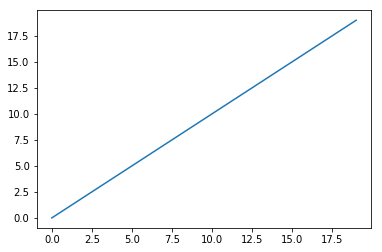

In [3]:
plt.plot(range(20),range(20));
#plt.show()

Great, a blank figure! Not terribly useful yet.

However, while we're on the topic, you can **control the size** of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A really useful utility function is [`figaspect`](http://matplotlib.org/api/figure_api.html?highlight=figaspect#matplotlib.figure.figaspect)

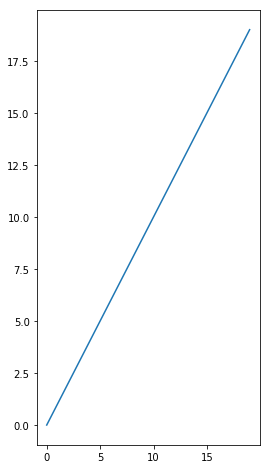

In [4]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0))
plt.plot(range(20), range(20));
#plt.show();

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes).  
* An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things.  
* An *Axes* object must belong to a *Figure* (and only one *Figure*). 
* Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly.  
(Again a "subplot" is just an axes on a grid system.) 

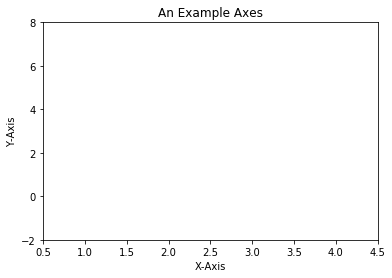

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


Notice the call to ``set``.  
Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.   
You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

In [6]:
# ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
#        ylabel='Y-Axis', xlabel='X-Axis')
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

Text(0.5, 17.200000000000003, 'X-Axis')

Clearly this can get repitive quickly.   
Therefore, Matplotlib's `set` method can be very handy.   
It takes each kwarg you pass it and tries to call the corresponding "setter".   

For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.   
Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.   
For now, let's focus on two methods: `plot` and `scatter`.

* `plot` draws **points with lines** connecting them.  
* `scatter` draws **unconnected points**, optionally scaled or colored by additional variables.

As a basic example:

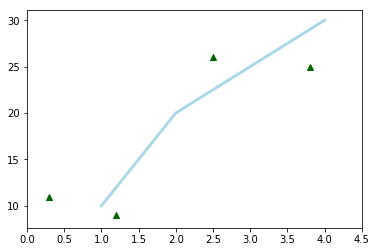

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.0, 4.5)
plt.show()

## Axes methods vs. pyplot

Interestingly, just about **all methods** of an *Axes* object exist **as a function** in the *pyplot* module (and vice-versa).  
For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current".   
Here is an equivalent version of the above example **using just pyplot**.

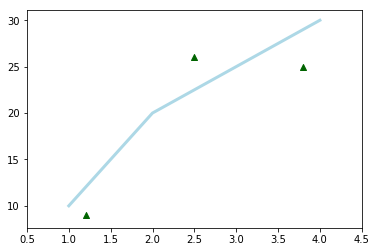

In [52]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

Much cleaner, and much clearer!  
So, why will most of my examples not follow the pyplot approach?  
Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"`Explicit is better than implicit`"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have **multiple axes in one figure**.

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.   
If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

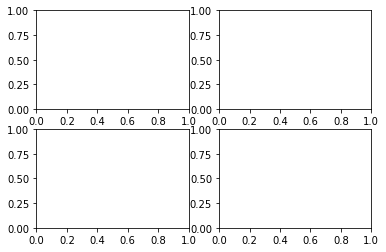

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2)
#plt.show()

`plt.subplots(...)` created a new figure and added **4 subplots** to it.   
The `axes` object that was returned is a 2D numpy object array.   
Each item in the array is one of the subplots.   
They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

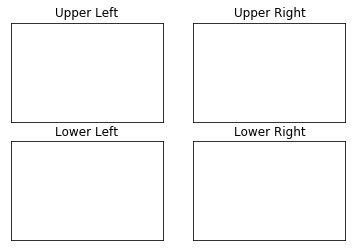

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
#plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

Quick Exercise: Exercise 1.1
--------------

Let's use some of what we've been talking about.  Can you reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

In [ ]:
# %load exercises/1.1-subplots_and_basic_plotting.py
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?


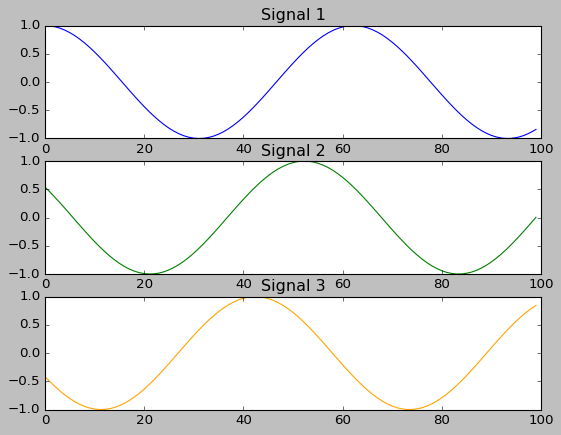

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
fig, axes = plt.subplots(nrows=3, ncols=1)
axes[0].set(title=names[0])
axes[0].plot(y1, color='blue', linewidth=1)
axes[1].set(title=names[1])
axes[1].plot(y2, color='green', linewidth=1)
axes[2].set(title=names[2])
axes[2].plot(y3, color='orange', linewidth=1)


